In [13]:
#Data Processing Program
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("dataset1_dirty.csv", names = ['Age','Work Class', 'Fnlwgt', 'Education', 'Education-num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Salary'])

df.columns = map(str.upper, df.columns)

df['AGE']=df['AGE'].abs()
df['AGE']=df['AGE'].replace(0, 17)

work_class=df['WORK CLASS']
work_class_cleaned=[]
for i in work_class:
    if("ot" in i):
        work_class_cleaned.append('Self-emp-not-inc')
    elif("self" in i.lower()):
        work_class_cleaned.append('Self-emp-inc')
    elif("federal" in i.lower()):
        work_class_cleaned.append('Federal-gov')
    elif("local" in i.lower()):
        work_class_cleaned.append('Local-gov')
    elif("state" in i.lower()):
        work_class_cleaned.append('State-gov')
    elif("without" in i.lower()):
        work_class_cleaned.append('Without-pay')
    elif("never" in i.lower()):
        work_class_cleaned.append('Never-worked')
    elif("private" in i.lower()):
        work_class_cleaned.append('Private')
    else:
        work_class_cleaned.append(i)

df['WORK CLASS']=work_class_cleaned

occupation=df['OCCUPATION']
occupation_cleaned=[]
for i in occupation:
    if(('supp' in i.lower()) or 'tech' in i.lower()):
        occupation_cleaned.append('Tech-support')
    elif(('rep' in i.lower()) or 'craf' in i.lower() or 'cra' in i.lower()):
        occupation_cleaned.append('Craft-repair')
    elif(('service' in i.lower()) or 'othr' in i.lower() or 'other' in i.lower()):
        occupation_cleaned.append('Other-service')
    elif(('hand' in i.lower()) or 'clean' in i.lower() or 'Handlersleaners' in i.lower()):
        occupation_cleaned.append('Handlers-cleaners')    
    elif(('ales' in i.lower()) or ('aes' in i.lower()) or 'ale' in i.lower() or 'sals' in i.lower() or 'sas' in i.lower() or 'sle' in i.lower()):
        occupation_cleaned.append('Sales')
    elif(('exec' in i.lower()) or 'manag' in i.lower()):
        occupation_cleaned.append('Exec-managerial')
    elif(('prof' in i.lower()) or 'spec' in i.lower()):
        occupation_cleaned.append('Prof-specialty')
    elif(('inspc' in i.lower()) or 'achi' in i.lower()):
        occupation_cleaned.append('Machine-op-inspct') 
    elif(('adm' in i.lower()) or 'rica' in i.lower()):
        occupation_cleaned.append('Adm-clerical')
    elif(('fish' in i.lower()) or 'farm' in i.lower()):
        occupation_cleaned.append('Farming-fishing')
    elif(('movi' in i.lower()) or 'movn' in i.lower() or 'transpo' in i.lower()):
        occupation_cleaned.append('Transport-moving')
    elif('priv' in i.lower()):
        occupation_cleaned.append('Priv-house-serv')
    elif(('prot' in i.lower()) or 'serv' in i.lower()):
        occupation_cleaned.append('Protective-serv')
    elif('armed' in i.lower()):
        occupation_cleaned.append('Armed-Forces')    
    else:
        occupation_cleaned.append(i)

df['OCCUPATION']=occupation_cleaned



df.to_csv('dataset1_processed.csv',header=False,index=False)

print("Results")
print("rows:",len(df.axes[0]))
for i in df.columns.values:
    if df[i].dtypes != 'int64':
        print(str(i)+": "+str(len(df[i].unique().tolist())))
        index_list_categorical=df[i].value_counts().index.tolist()
        values_list_categorical=df[i].value_counts().values.tolist()
        for k in range(0,len(index_list_categorical)):
            print("  "+str(index_list_categorical[k])+": "+str(values_list_categorical[k]))
    else:
        print(str(i)+": ",end=" ")
        index_list_numeric=df[i].describe().index.tolist()
        values_list_numeric=df[i].describe().values.tolist()
        for k in range(0,len(index_list_numeric)):
            if(index_list_numeric[k] in ['min','mean','std']):
                print(str(index_list_numeric[k])+": "+str(values_list_numeric[k]),end=", ")
            elif(index_list_numeric[k] in ['max']):
                print(str(index_list_numeric[k])+": "+str(values_list_numeric[k]),end="\n")



Results
rows: 30162
AGE:  mean: 38.23244479809031, std: 13.240754258743262, min: 17.0, max: 90.0
WORK CLASS: 8
  Private: 21833
  Self-emp-not-inc: 2451
  Local-gov: 2019
  State-gov: 1255
  Self-emp-inc: 1053
  Federal-gov: 923
  ?: 614
  Without-pay: 14
FNLWGT:  mean: 189793.83393011073, std: 105652.97152851959, min: 13769.0, max: 1484705.0
EDUCATION: 16
  HS-grad: 9840
  Some-college: 6678
  Bachelors: 5044
  Masters: 1627
  Assoc-voc: 1307
  11th: 1048
  Assoc-acdm: 1008
  10th: 820
  7th-8th: 557
  Prof-school: 542
  9th: 455
  12th: 377
  Doctorate: 375
  5th-6th: 288
  1st-4th: 151
  Preschool: 45
EDUCATION-NUM:  mean: 10.12131158411246, std: 2.549994918856753, min: 1.0, max: 16.0
MARITAL-STATUS: 7
  Married-civ-spouse: 14065
  Never-married: 9726
  Divorced: 4214
  Separated: 939
  Widowed: 827
  Married-spouse-absent: 370
  Married-AF-spouse: 21
OCCUPATION: 15
  Craft-repair: 3968
  Prof-specialty: 3966
  Exec-managerial: 3913
  Adm-clerical: 3645
  Sales: 3498
  Other-service

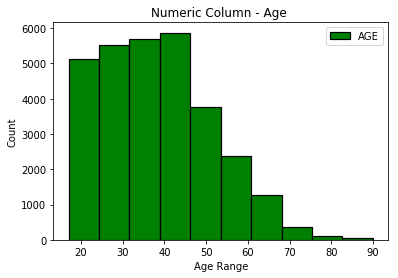

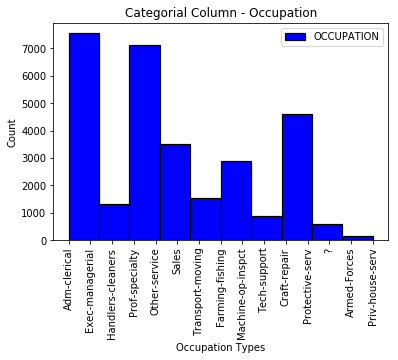

In [14]:
#Histogram Code
%matplotlib inline


hist_age = df['AGE']
legend_age = ['AGE']
plt.hist([hist_age], color='green', edgecolor='black', linewidth=1.2)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.legend(legend_age)
plt.title('Numeric Column - Age ')
plt.show()

hist_occupation = df['OCCUPATION']
legend_occupation = ['OCCUPATION']
plt.hist([hist_occupation], color=[ 'blue'],edgecolor='black', linewidth=1.2)
plt.xticks(rotation='vertical')
plt.xlabel("Occupation Types")
plt.ylabel("Count")
plt.legend(legend_occupation)
plt.title('Categorial Column - Occupation')
plt.show()